## Load Data

In [0]:
import os
import json
import numpy as np
import pandas as pd

In [0]:
amazon = pd.read_csv('drive/INFO7374_NeuralNetwork&AI/Assignment_3/amazon_result.csv') 
google = pd.read_csv('drive/INFO7374_NeuralNetwork&AI/Assignment_3/google_result.csv') 
ibm = pd.read_csv('drive/INFO7374_NeuralNetwork&AI/Assignment_3/ibm_result.csv') 
microsoft = pd.read_csv('drive/INFO7374_NeuralNetwork&AI/Assignment_3/msft_result.csv') 

In [0]:
amazon.rename(columns={'score': 'score_amazon'}, inplace=True)
google.rename(columns={'score': 'score_google'}, inplace=True)
ibm.rename(columns={'score': 'score_ibm'}, inplace=True)
microsoft.rename(columns={'score': 'score_microsoft'}, inplace=True)

In [0]:
new1 = pd.merge(amazon,google,on="text",how='outer')
new2 = pd.merge(new1,ibm,on="text",how='outer')
new3 = pd.merge(new2,microsoft,on="text",how='outer')

new3.drop_duplicates(subset ="text", 
                     keep = False, inplace = True) 
data = new3[['score_amazon', 'score_google','score_microsoft', 'score_ibm','label']]

In [0]:
data.rename(columns={"label":"target"}, inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,score_amazon,score_google,score_microsoft,score_ibm,target
64,0.740363,0.0,0.500000,0.604644,2
65,0.007116,0.0,0.500000,0.000000,0
66,0.015574,0.4,0.500000,NaN,0
67,0.110512,0.1,0.288136,NaN,1
68,0.014443,0.0,0.500000,0.000000,1


In [0]:
data = data.fillna(0)

In [0]:
data.head()

,score_amazon,score_google,score_microsoft,score_ibm,target
64,0.740363,0.0,0.500000,0.604644,2
65,0.007116,0.0,0.500000,0.000000,0
66,0.015574,0.4,0.500000,0.000000,0
67,0.110512,0.1,0.288136,0.000000,1
68,0.014443,0.0,0.500000,0.000000,1


In [0]:
data.to_csv("drive/INFO7374_NeuralNetwork&AI/Assignment_3/tpot_data.csv",index=False)

## AEVERAGE SCORE ACROSS 4 APIS

In [0]:
data = pd.read_csv('drive/INFO7374_NeuralNetwork&AI/Assignment_3/output/tpot_data.csv')

In [0]:
from sklearn import preprocessing

x = data.iloc[:,:-1].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [6]:
df.head()

,0,1,2,3
0,0.741461,0.4375,0.468244,0.789435
1,0.007118,0.4375,0.468244,0.447697
2,0.015588,0.6875,0.468244,0.447697
3,0.110668,0.5000,0.241653,0.447697
4,0.014455,0.4375,0.468244,0.447697


In [0]:
df['avg'] =  df.mean(axis = 1)
df_avg = pd.DataFrame(df['avg'])

In [0]:
def set_pred(avg):
  for avg in avg:
    if avg > 0.45:
        return 2
    elif avg <0.30:
        return 0
    else:
      return 1

df_avg = df_avg.assign(p=df_avg.apply(set_pred, axis=1))

In [113]:
df_avg.head()

,avg,p
0,0.609160,2
1,0.340140,1
2,0.404757,1
3,0.325005,1
4,0.341974,1


In [114]:
y_pred = list(df_avg['p'])
y_actual = list(data.iloc[:,-1])

len(y_actual), len(y_pred)

(1519, 1519)

In [0]:
correct = [y_pred[i] == y_actual[i] for i in range(len(y_pred))]
acc = correct.count(True)/len(y_actual)

Accuracy with the average of API score is 0.511520737327189


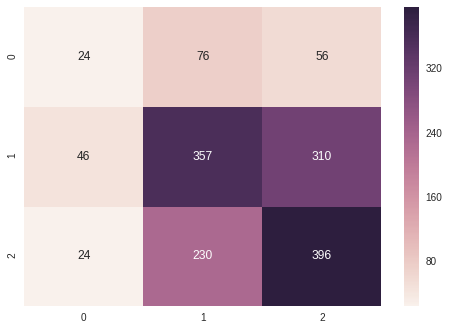

In [116]:
import seaborn as sns
from sklearn import metrics

print('Accuracy with the average of API score is {}'.format(acc))

matrix = metrics.confusion_matrix(y_actual, y_pred)

sns.heatmap(matrix,annot=True,fmt='.5g')